# DataSet #3: Mobilitat entre Municipis

Autor: Marc Bosch Manzano<br>
Data: Octubre 2025<br>
Iteració: 2a<br>
Projecte: MobiCat

## Anàlisi de les Distribucions dels Atributs

### Importació de Llibreries

In [ ]:
PACKAGES = ["pandas", "matplotlib", "numpy", "seaborn"]
COLORS = ["viridis", "plasma", "inferno", "magma", "cividis"]

import importlib
import sys
sys.path.append('../mobicat_python_utils')

import utils
importlib.reload(utils)
utils.install_missing_packages(PACKAGES)

import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import dayplot as dp

import IPython.display 
IPython.display.clear_output()

### Importació de les Dades

**Important**: importa al directori *test-data* els següents fitxers o canviar el directori pel directori amb els fitxers. 
```bash
    movilidad_barrios_2023-01_origen.csv
    movilidad_municipios_2023-01_origen.csv
    movilidad_mun_barrios_2023-01_origen.csv
```

In [ ]:
mobility_directory = "./test-data/"
mobility_file_name = "movilidad_municipios_2023-01_origen.csv"
mobility_file_path = os.path.join(mobility_directory, mobility_file_name)

mobility_df = pd.read_csv(mobility_file_path, dtype=str)
mobility_df["viajes"] = mobility_df["viajes"].astype(int)
mobility_df["day"] = pd.to_datetime(mobility_df["day"])
mobility_df = mobility_df[mobility_df["viajes"] > 0]

file_name_day = "movilidad_municipios_por_dia.csv"
file_path_day = os.path.join(mobility_directory, file_name_day)
day_df = pd.read_csv(file_path_day)
day_df["day"] = pd.to_datetime(day_df["day"])
day_filtered_df = utils.filter_day_by_year(day_df, 2023) 

municipalities_df = utils.group_by_municipality(mobility_df)

In [87]:
day_of_week_freq = day_df.groupby(by="day_of_week")["viajes"].sum().reset_index()
day_of_week_freq = day_of_week_freq.sort_values(by="viajes", ascending=False)
day_of_week_freq

,day_of_week,viajes
1,Jueves,592496100
6,Viernes,590042834
4,Miércoles,578763189
3,Martes,574402108
2,Lunes,542087678
5,Sábado,448814520
0,Domingo,359993371


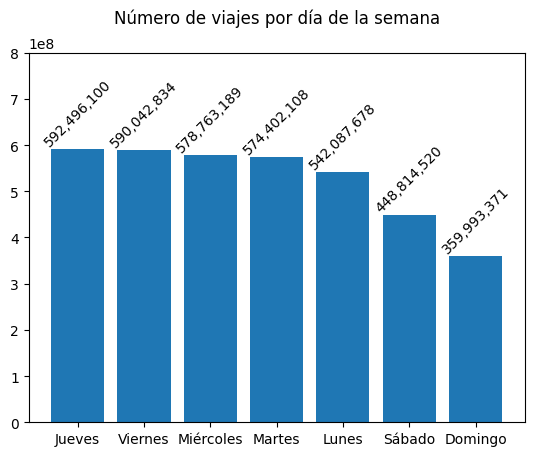

In [94]:
fig, ax = plt.subplots()
bars = ax.bar(day_of_week_freq["day_of_week"], day_of_week_freq["viajes"])
ax.bar_label(bars, fmt='{:,.0f}', rotation=45, label_type='edge')
ax.set_ylim(0, 8e8)
plt.title("Número de viajes por día de la semana\n")
plt.show()

In [7]:
origen_freq = mobility_df.groupby(by="origen")["viajes"].sum().reset_index()
origen_freq

,origen,viajes
0,Internacional,6255110
1,Nacional,4599479
2,Regional,82111917
3,Residente,14090412


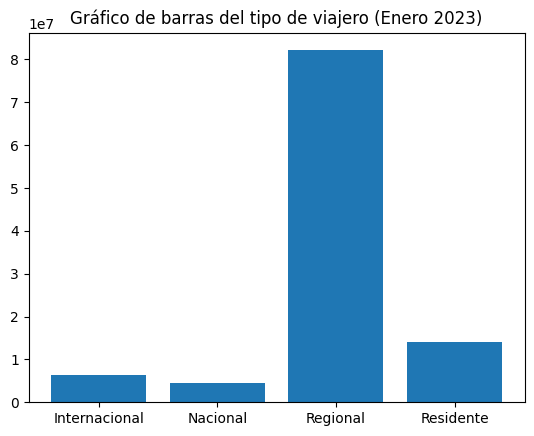

In [96]:
plt.figure()
plt.bar(origen_freq["origen"], origen_freq["viajes"])
plt.title("Gráfico de barras del tipo de viajero (Enero 2023)")
plt.show()

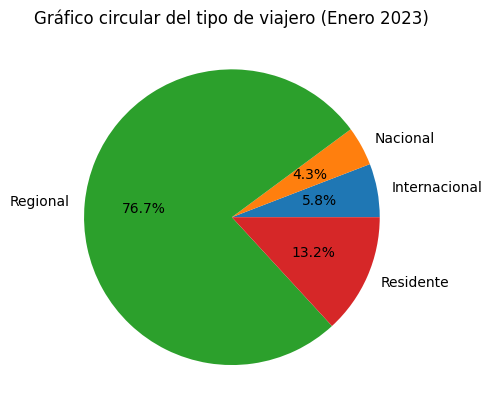

In [97]:
fig, ax = plt.subplots()
ax.pie(origen_freq["viajes"], labels=origen_freq["origen"], autopct="%1.1f%%")
plt.title("Gráfico circular del tipo de viajero (Enero 2023)")
plt.show()

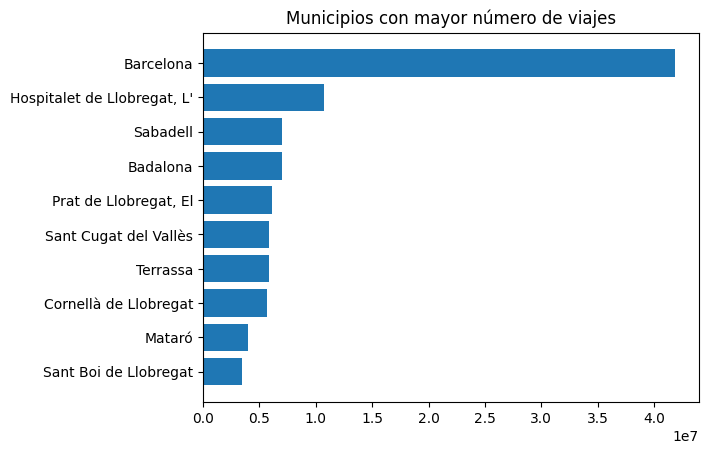

In [45]:
largest_df = municipalities_df.nlargest(10, "viajes")
top5_sorted = largest_df.sort_values(by="viajes", ascending=True) 
plt.barh(top5_sorted["municipio_name"], top5_sorted["viajes"])
plt.title("Municipios con mayor número de viajes")
plt.show()

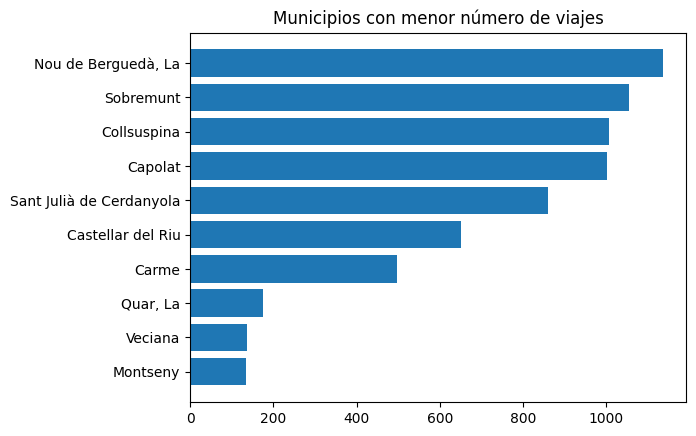

In [ ]:
smallest_df = municipalities_df.nsmallest(10, "viajes")
plt.barh(smallest_df["municipio_name"], smallest_df["viajes"])
plt.title("Municipios con menor número de viajes")
plt.show()

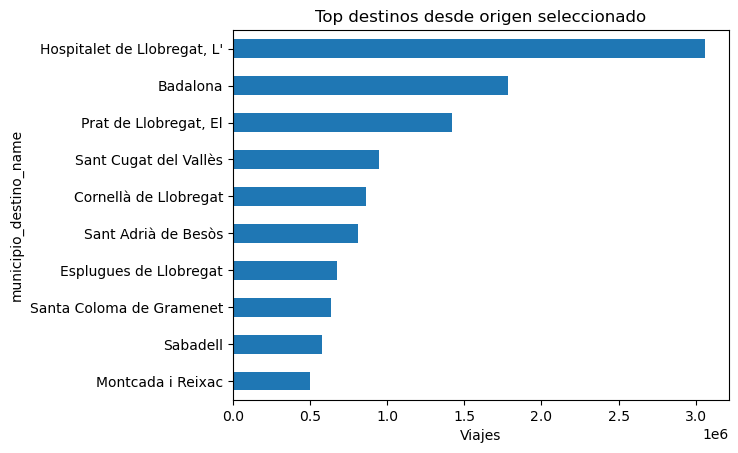

In [ ]:
origen_sel = "08019"  # Barcelona (ej.)
topd = (mobility_df[mobility_df["municipio_origen"]==origen_sel]
        .groupby("municipio_destino_name")["viajes"].sum().nlargest(10))
topd.plot.barh(); plt.xlabel("Viajes"); plt.title("Top destinos desde origen seleccionado"); plt.gca().invert_yaxis()

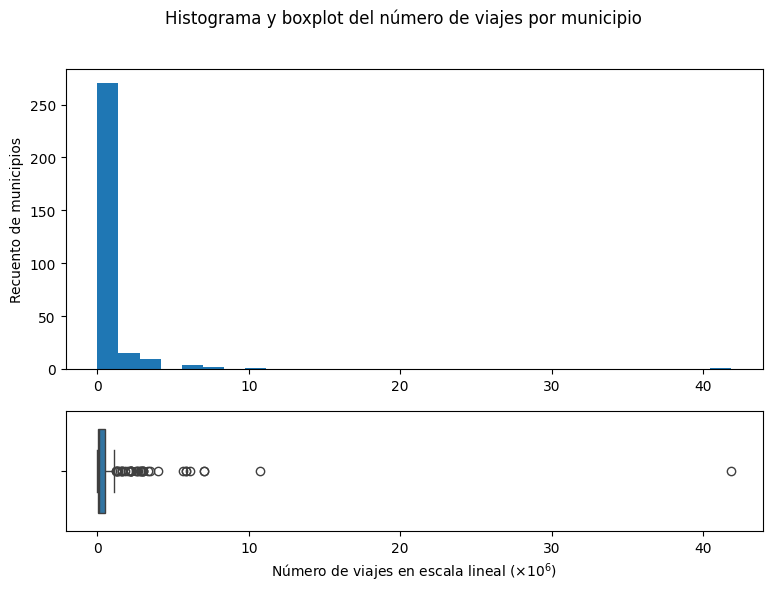

In [ ]:
utils.plot_histogram_and_boxplot(
    array=municipalities_df["viajes"],
    figsize=(9, 6),
    height_ratios=[5, 2],
    histogram_bins=30,
    ticks=(ticks := [0e7, 1e7, 2e7, 3e7, 4e7]),
    labels=[int(t/1e6) for t in ticks],
    xlabel="Número de viajes en escala lineal $(×10^6)$",
    ylabel="Recuento de municipios",
    title="Histograma y boxplot del número de viajes por municipio",
)

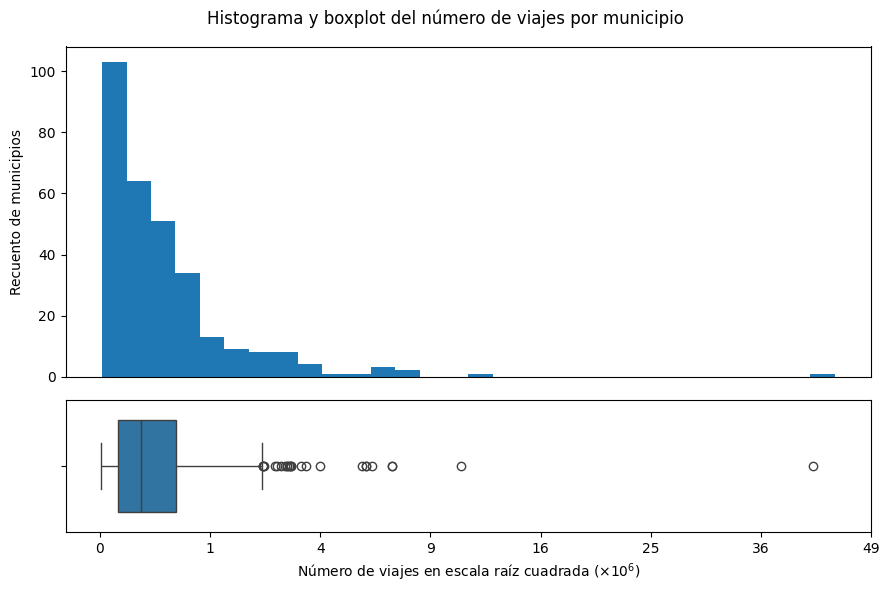

In [ ]:
utils.plot_histogram_and_boxplot(
    array=np.sqrt(municipalities_df["viajes"]),
    figsize=(9, 6),
    height_ratios=[5, 2],
    ticks=(ticks := [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000]),
    labels=[int(t**2/1e6) for t in ticks],
    histogram_bins= 30,
    xlabel="Número de viajes en escala raíz cuadrada $(×10^6)$",
    ylabel="Recuento de municipios",
    title="Histograma y boxplot del número de viajes por municipio",
)

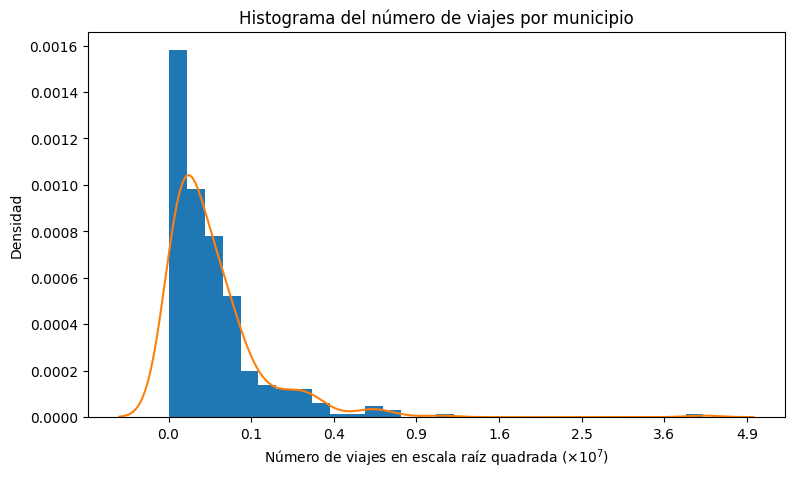

In [74]:
plt.figure(figsize=(9, 5))

plt.hist(
    x=np.sqrt(municipalities_df["viajes"]),
    density=True,
    bins=30,
)

sns.kdeplot(
    x=np.sqrt(municipalities_df["viajes"]),
)

plt.title("Histograma del número de viajes por municipio")
plt.xlabel("Número de viajes en escala raíz quadrada $(×10^7)$")
plt.ylabel("Densidad")
ticks = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
labels = [t**2/1e7 for t in ticks]
plt.xticks(ticks, labels)

plt.show()

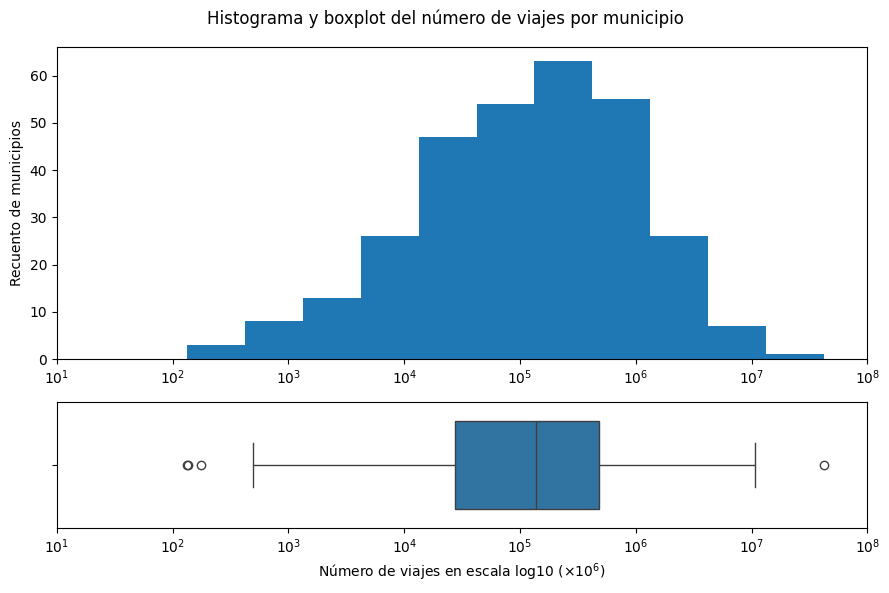

In [ ]:
utils.plot_histogram_and_boxplot(
    array=np.log10(municipalities_df["viajes"]),
    figsize=(9, 6),
    height_ratios=[5, 2],
    ticks=(ticks := [1, 2, 3, 4, 5, 6, 7, 8]),
    labels=[f"$10^{t}$" for t in ticks],
    histogram_bins=11,
    xlabel="Número de viajes en escala log10 $(×10^6)$",
    ylabel="Recuento de municipios",
    title="Histograma y boxplot del número de viajes por municipio"
)

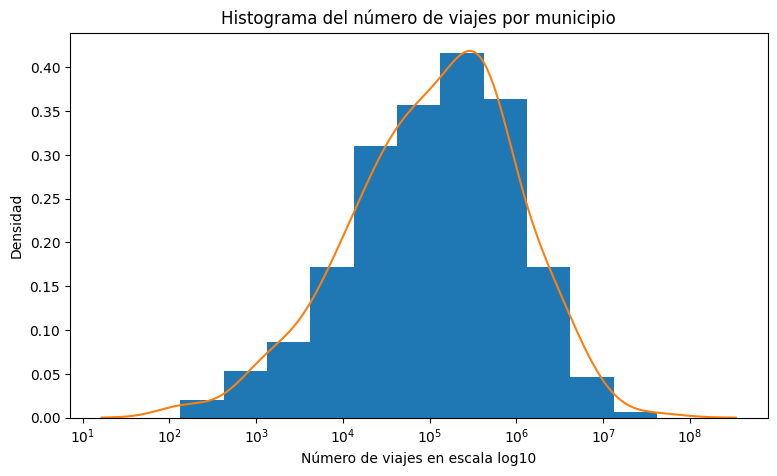

In [77]:
utils.plot_histogram_with_density(
    array=np.log10(municipalities_df["viajes"]),
    figsize=(9,5),
    histogram_bins=11,
    title="Histograma del número de viajes por municipio",
    xlabel="Número de viajes en escala log10",
    ylabel="Densidad",
    ticks=(ticks:=[ 1, 2, 3, 4, 5, 6, 7, 8]),
    labels=[f"$10^{t}$" for t in ticks]
)

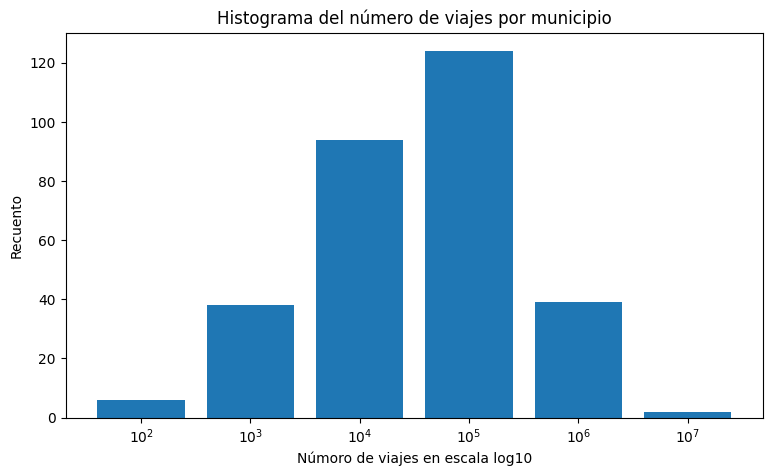

In [ ]:
histogram_bins = [0, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, float("inf")]

municipalities_df["bin"] = pd.cut(
    x=municipalities_df["viajes"],
    bins=histogram_bins,
    labels=range(1, len(histogram_bins)),
    include_lowest=True
).astype(int) 

count_bins = municipalities_df.groupby(by="bin").count().reset_index()

municipalities_df.head(20)

plt.figure(figsize=(9, 5))

plt.bar(
    count_bins["bin"],
    count_bins["municipio"],

)

plt.title("Histograma del número de viajes por municipio")
plt.xlabel("Númoro de viajes en escala log10")
plt.ylabel("Recuento")

ticks = [2, 3, 4, 5, 6, 7]
labels = [f"$10^{t}$" for t in ticks]

plt.xticks(ticks, labels)

plt.show()